##### In questa sezione importiamo tutte le librerie necessarie: `face_recognition` per l'elaborazione dei volti, `cv2` per la gestione dei flussi video tramite OpenCV, e `numpy` per operazioni matematiche e gestione dei dati numerici.

In [56]:
import face_recognition
import cv2
import numpy as np
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

## Carica il video da file

In [57]:
video_capture = cv2.VideoCapture("dataset/test.mp4")
if not video_capture.isOpened():
    print("Errore: impossibile aprire test.mp4")
    exit()

## Imposta il salvataggio del video di output

In [58]:
fps = video_capture.get(cv2.CAP_PROP_FPS)
width = int(video_capture.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
fourcc = cv2.VideoWriter_fourcc(*"mp4v")  # codec compatibile mp4
out = cv2.VideoWriter("output.mp4", fourcc, fps, (width, height))

## Carica le immagini dei volti noti e calcola le codifiche

In [59]:
stenni_image = face_recognition.load_image_file("dataset/stefano.jpg")
stenni_face_encoding = face_recognition.face_encodings(stenni_image)[0]

antonio_image = face_recognition.load_image_file("dataset/antonio.jpg")
antonio_face_encoding = face_recognition.face_encodings(antonio_image)[0]

raoul_image = face_recognition.load_image_file("dataset/raoul.jpg")
raoul_face_encoding = face_recognition.face_encodings(raoul_image)[0]

 ## Array con codifiche e nomi dei volti noti

In [60]:
known_face_encodings = [
    stenni_face_encoding,
    antonio_face_encoding,
    raoul_face_encoding
]
known_face_names = [
    "Stefano",
    "Antonio",
    "Raoul"
]

## Inizializza le variabili

In [61]:
face_locations = []
face_encodings = []
face_names = []
process_this_frame = True

### Loop principale del riconoscimento:

- Campionamento video ottimizzato
- Riconoscimento volti e coordinate per frame
- Matching volti con dataset
- Visulizzazione dei risultati tramite box

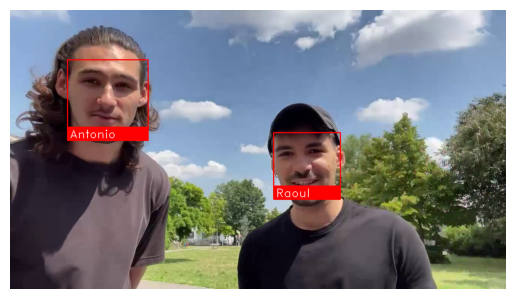

In [ ]:
while True:
    # Acquisisce un singolo frame dal video
    ret, frame = video_capture.read()
    if not ret:
        break

    # 0 per flipping verticale
    # frame = cv2.flip(frame, 0)

    # Processa un frame sì e uno no
    if process_this_frame:
        # Riduce il frame a 1/4 per velocizzare l'elaborazione
        small_frame = cv2.resize(frame, (0, 0), fx=0.25, fy=0.25)

        # Converte da BGR (OpenCV) a RGB (face_recognition)
        rgb = cv2.cvtColor(small_frame, cv2.COLOR_BGR2RGB)

        # Trova volti e relative codifiche nel frame
        face_locations = face_recognition.face_locations(rgb)
        face_encodings = face_recognition.face_encodings(rgb, face_locations)

        face_names = []

        for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
            # Confronta il volto con quelli noti
            matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
            name = "Sconosciuto"
            confidence = 0.0

            # Calcola la distanza tra il volto rilevato e quelli noti
            face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
            best_match_index = np.argmin(face_distances)

            if matches[best_match_index]:
                name = known_face_names[best_match_index]
                #confidence = (1 - face_distances[best_match_index]) * 100
                #name += f" ({confidence:.2f}%)"

            face_names.append(name)

    process_this_frame = not process_this_frame

    # Visualizza i risultati
    for (top, right, bottom, left), name in zip(face_locations, face_names):
        # Scala nuovamente le coordinate al frame originale
        top *= 4
        right *= 4
        bottom *= 4
        left *= 4

        # Disegna un riquadro attorno al volto
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)

        # Disegna l'etichetta con il nome e percentuale
        cv2.rectangle(frame, (left, bottom - 35), (right, bottom), (0, 0, 255), cv2.FILLED)
        cv2.putText(frame, name, (left + 6, bottom - 6),
        cv2.FONT_HERSHEY_DUPLEX, 1.0, (255, 255, 255), 1)

    out.write(frame)

    # Mostra il frame
    #cv2.imshow('Rilevamento Facciale', frame)

    # Converti frame in RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Visualizza
    plt.imshow(frame_rgb)
    plt.axis("off")
    display(plt.gcf())
    clear_output(wait=True)

    # Esce premendo 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Rilascia risorse
video_capture.release()
out.release()
cv2.destroyAllWindows()